# Clasificadores 

Hoy vamos a revisar una compración entre varios métodos de clasificación. La intención es que se hagan una idea de como funcionan la desición de las fronteras de los diferentes clasificadores. Los Datasets son sintéticos, por tanto notemos que las intuiciones que nos puedan dar debemos tomorlas con cuidado

En particular cuando hablamos de espacios en dimensiones altas, 
Particularly in high-dimensional spaces, los datos se pueden separar más fácilmente de forma lineal y la simplicidad de los clasificadores, como los Bayes ingenuos y las SVM lineales, podría conducir a una mejor generalización que la que logran otros clasificadores.

Vamos a importar las librerias comunes:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vamos también a importar todas las herramientas particulares que vamos a necesitar, además de los clásificadores en si mismos, pueden encontrar todos los detalles de los datasets en la [documentacion de SKLeran](https://scikit-learn.org/stable/supervised_learning.html)

In [2]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Ahora vamos a prodecer a generar los objetos de clasificador, además de generar los datos con los que vamos a entrenar los mododelos.

In [3]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

Ahora realizemos la clasificación, además de graficarla y estudiar de buenas a primeras como se diferencia cada método.

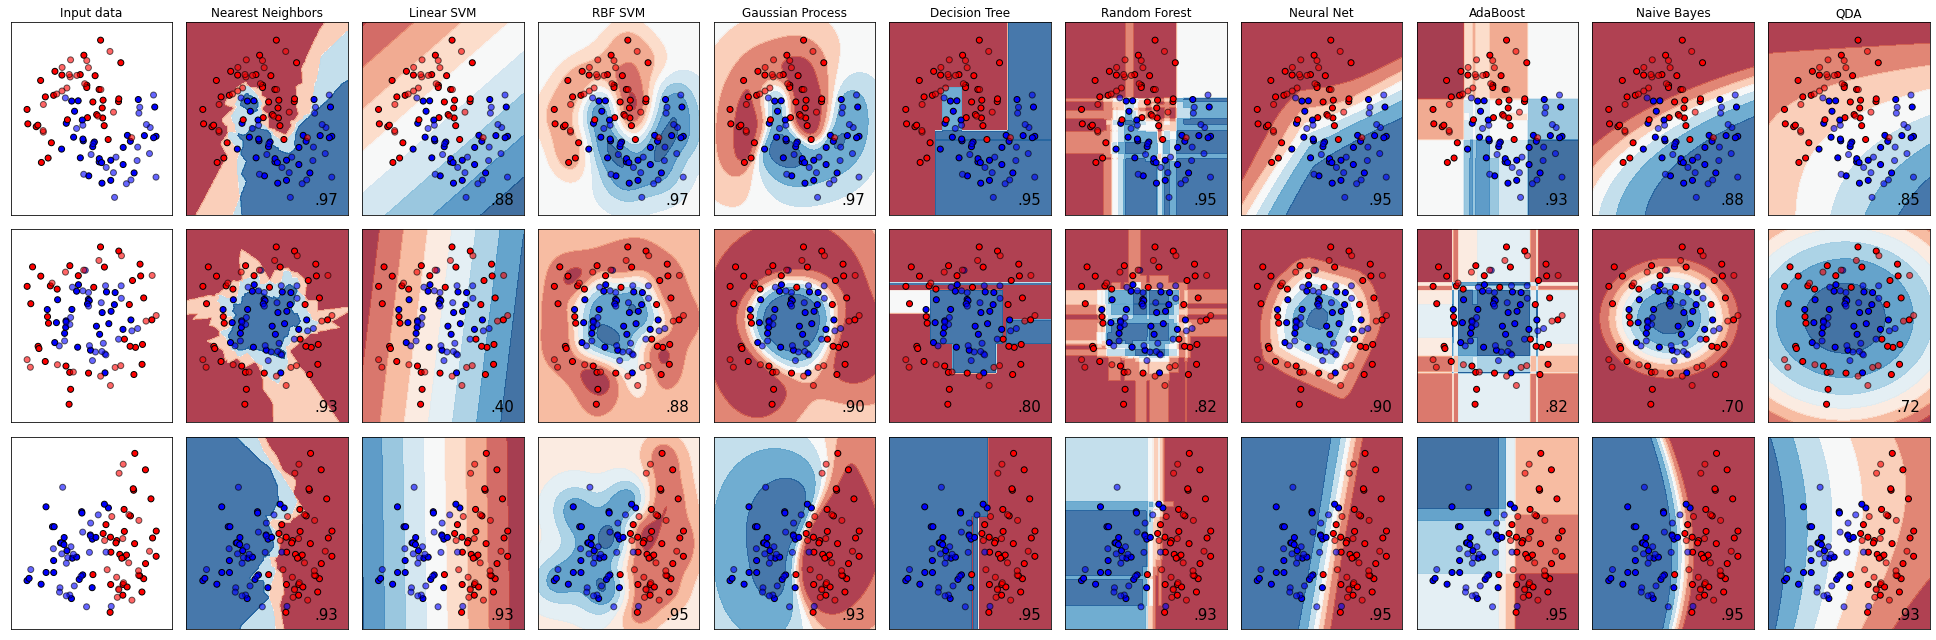

In [4]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

Los gráficos muestran puntos de entrenamiento en colores sólidos y puntos de prueba semitransparentes. La parte inferior derecha muestra la precisión de clasificación en el equipo de prueba.

## Actividades.
### Clasificando números escritos a mano.
Ahora que tienes una idea de cuales son los algoritmos de clasificación que tienes a tu alcance, revisaremos uno de los problemas clásicos de clasificación, la clasificación de numeros escritos a mano. Revisemos como se ven los datos.

In [ ]:
# The digits dataset
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[:], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Vamos a dejar los datos en forma de vector para que los modelos puedan tomarlos

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Crea un clasificador, con el módelo que más te llame la antención

In [ ]:
classifier = #fill

Ocupa `train_test_split` para separar los datos (deja la mitad para cada cosa)

In [ ]:
X_train, X_test, y_train, y_test = #fill

Ocupemos los datos que dejamos deparados en un principio para entrenar

In [ ]:
#fill

Ahora predice los valores para los datos que dejamos para probar el dataset

In [ ]:
predicted = #fill

Ahora, revisamos como le fue a tu modelo

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

### Actividad 2

Ahora con menos ayuda, te dejo este datasets de frutas, usa tu método favorito para clasificar estas frutas.

In [ ]:
fruits = pd.read_csv('data/fruit_data_with_colors.txt', sep = '	' )
fruits.head()